In [40]:
import os
import pandas as pd
import numpy as np
# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
from scipy.io import arff
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute
# Library to perform Expectation-Maximization (EM) imputation
import impyute as impy
# To perform mean imputation
from sklearn.preprocessing import Imputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 

# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

ModuleNotFoundError: No module named 'missingno'

In [2]:
os.getcwd()

'C:\\Users\\Gnanendra\\Downloads'

In [80]:
bank_data = pd.read_csv("bank_data.csv")

In [81]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 65 columns):
Attr1     24990 non-null float64
Attr2     24990 non-null float64
Attr3     24990 non-null float64
Attr4     24910 non-null float64
Attr5     24951 non-null float64
Attr6     24990 non-null float64
Attr7     24990 non-null float64
Attr8     24931 non-null float64
Attr9     24988 non-null float64
Attr10    24990 non-null float64
Attr11    24086 non-null float64
Attr12    24910 non-null float64
Attr13    24913 non-null float64
Attr14    24990 non-null float64
Attr15    24968 non-null float64
Attr16    24931 non-null float64
Attr17    24931 non-null float64
Attr18    24990 non-null float64
Attr19    24912 non-null float64
Attr20    24913 non-null float64
Attr21    19595 non-null float64
Attr22    24990 non-null float64
Attr23    24913 non-null float64
Attr24    24495 non-null float64
Attr25    24990 non-null float64
Attr26    24931 non-null float64
Attr27    22269 non-null float64


In [82]:
info_return = bank_data.info()
count_return = bank_data.count()
info_return is None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24996 entries, 0 to 24995
Data columns (total 65 columns):
Attr1     24990 non-null float64
Attr2     24990 non-null float64
Attr3     24990 non-null float64
Attr4     24910 non-null float64
Attr5     24951 non-null float64
Attr6     24990 non-null float64
Attr7     24990 non-null float64
Attr8     24931 non-null float64
Attr9     24988 non-null float64
Attr10    24990 non-null float64
Attr11    24086 non-null float64
Attr12    24910 non-null float64
Attr13    24913 non-null float64
Attr14    24990 non-null float64
Attr15    24968 non-null float64
Attr16    24931 non-null float64
Attr17    24931 non-null float64
Attr18    24990 non-null float64
Attr19    24912 non-null float64
Attr20    24913 non-null float64
Attr21    19595 non-null float64
Attr22    24990 non-null float64
Attr23    24913 non-null float64
Attr24    24495 non-null float64
Attr25    24990 non-null float64
Attr26    24931 non-null float64
Attr27    22269 non-null float64


True

In [83]:
bank_data.isna().sum()

Attr1         6
Attr2         6
Attr3         6
Attr4        86
Attr5        45
Attr6         6
Attr7         6
Attr8        65
Attr9         8
Attr10        6
Attr11      910
Attr12       86
Attr13       83
Attr14        6
Attr15       28
Attr16       65
Attr17       65
Attr18        6
Attr19       84
Attr20       83
Attr21     5401
Attr22        6
Attr23       83
Attr24      501
Attr25        6
Attr26       65
Attr27     2727
Attr28      527
Attr29        6
Attr30       83
          ...  
Attr36        6
Attr37    11468
Attr38        6
Attr39       83
Attr40       86
Attr41      367
Attr42       83
Attr43       83
Attr44       83
Attr45     1770
Attr46       88
Attr47      170
Attr48        6
Attr49       83
Attr50       65
Attr51        6
Attr52      174
Attr53      527
Attr54      527
Attr55        0
Attr56       83
Attr57        7
Attr58       54
Attr59        7
Attr60     1770
Attr61       61
Attr62       83
Attr63       86
Attr64      527
target        0
Length: 65, dtype: int64

In [84]:
bank_data.isna().sum()/len(bank_data)

Attr1     0.000240
Attr2     0.000240
Attr3     0.000240
Attr4     0.003441
Attr5     0.001800
Attr6     0.000240
Attr7     0.000240
Attr8     0.002600
Attr9     0.000320
Attr10    0.000240
Attr11    0.036406
Attr12    0.003441
Attr13    0.003321
Attr14    0.000240
Attr15    0.001120
Attr16    0.002600
Attr17    0.002600
Attr18    0.000240
Attr19    0.003361
Attr20    0.003321
Attr21    0.216075
Attr22    0.000240
Attr23    0.003321
Attr24    0.020043
Attr25    0.000240
Attr26    0.002600
Attr27    0.109097
Attr28    0.021083
Attr29    0.000240
Attr30    0.003321
            ...   
Attr36    0.000240
Attr37    0.458793
Attr38    0.000240
Attr39    0.003321
Attr40    0.003441
Attr41    0.014682
Attr42    0.003321
Attr43    0.003321
Attr44    0.003321
Attr45    0.070811
Attr46    0.003521
Attr47    0.006801
Attr48    0.000240
Attr49    0.003321
Attr50    0.002600
Attr51    0.000240
Attr52    0.006961
Attr53    0.021083
Attr54    0.021083
Attr55    0.000000
Attr56    0.003321
Attr57    0.

In [85]:
bank_data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.036348,0.29370,0.22999,1.95800,49.611,0.323820,0.044336,2.17300,1.0571,0.63820,...,0.054040,0.056955,0.94596,0.084022,4.5846,2.1621,128.140,2.8484,1.2904,No
1,0.032515,0.25971,0.40845,2.57270,-6.682,-0.000148,0.040253,2.85050,2.1327,0.74029,...,0.000329,0.043921,0.98201,0.000000,4.7734,10.3800,44.448,8.2118,6.4267,No
2,0.019116,0.55685,-0.20328,0.56593,-59.719,0.000000,0.019116,0.79581,2.0933,0.44315,...,0.016719,0.043137,0.99131,0.110710,16.4970,15.4440,81.660,4.4698,2.8481,No
3,-0.173850,0.28684,0.20102,1.73250,356.930,0.000000,-0.173850,2.48630,3.0166,0.71316,...,0.178720,-0.243780,0.82306,0.000000,30.1680,51.1950,33.206,10.9920,5.7509,No
4,0.410710,0.14770,0.78015,6.28190,271.120,0.000000,0.534880,5.77040,1.6009,0.85230,...,0.326340,0.481890,0.66935,0.000000,NaN,5.0324,33.676,10.8390,22.1870,No


In [139]:
bank_data["target"].value_counts()

0    20830
1     4166
Name: target, dtype: int64

In [87]:
bank_data.isnull().mean()

Attr1     0.000240
Attr2     0.000240
Attr3     0.000240
Attr4     0.003441
Attr5     0.001800
Attr6     0.000240
Attr7     0.000240
Attr8     0.002600
Attr9     0.000320
Attr10    0.000240
Attr11    0.036406
Attr12    0.003441
Attr13    0.003321
Attr14    0.000240
Attr15    0.001120
Attr16    0.002600
Attr17    0.002600
Attr18    0.000240
Attr19    0.003361
Attr20    0.003321
Attr21    0.216075
Attr22    0.000240
Attr23    0.003321
Attr24    0.020043
Attr25    0.000240
Attr26    0.002600
Attr27    0.109097
Attr28    0.021083
Attr29    0.000240
Attr30    0.003321
            ...   
Attr36    0.000240
Attr37    0.458793
Attr38    0.000240
Attr39    0.003321
Attr40    0.003441
Attr41    0.014682
Attr42    0.003321
Attr43    0.003321
Attr44    0.003321
Attr45    0.070811
Attr46    0.003521
Attr47    0.006801
Attr48    0.000240
Attr49    0.003321
Attr50    0.002600
Attr51    0.000240
Attr52    0.006961
Attr53    0.021083
Attr54    0.021083
Attr55    0.000000
Attr56    0.003321
Attr57    0.

In [89]:
bank_data["target"].value_counts()

No     20830
Yes     4166
Name: target, dtype: int64

In [90]:
#df['edjefe'].replace({'no': 0, 'yes': 1})

bank_data["target"] = bank_data["target"].replace({'No':0, 'Yes':1})

In [91]:
bank_data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.036348,0.29370,0.22999,1.95800,49.611,0.323820,0.044336,2.17300,1.0571,0.63820,...,0.054040,0.056955,0.94596,0.084022,4.5846,2.1621,128.140,2.8484,1.2904,0
1,0.032515,0.25971,0.40845,2.57270,-6.682,-0.000148,0.040253,2.85050,2.1327,0.74029,...,0.000329,0.043921,0.98201,0.000000,4.7734,10.3800,44.448,8.2118,6.4267,0
2,0.019116,0.55685,-0.20328,0.56593,-59.719,0.000000,0.019116,0.79581,2.0933,0.44315,...,0.016719,0.043137,0.99131,0.110710,16.4970,15.4440,81.660,4.4698,2.8481,0
3,-0.173850,0.28684,0.20102,1.73250,356.930,0.000000,-0.173850,2.48630,3.0166,0.71316,...,0.178720,-0.243780,0.82306,0.000000,30.1680,51.1950,33.206,10.9920,5.7509,0
4,0.410710,0.14770,0.78015,6.28190,271.120,0.000000,0.534880,5.77040,1.6009,0.85230,...,0.326340,0.481890,0.66935,0.000000,NaN,5.0324,33.676,10.8390,22.1870,0


In [92]:
bank_data["target"].value_counts()

0    20830
1     4166
Name: target, dtype: int64

In [93]:
missing_bank_data = bank_data.columns.isnull().any().tolist()

In [94]:
#Generate heat map of missing values

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

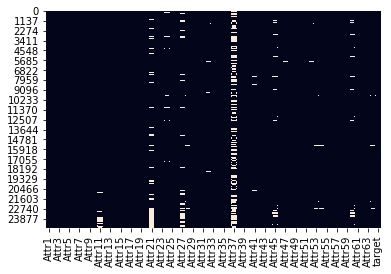

In [95]:
sns.heatmap(bank_data.isnull(), cbar=False)

<BarContainer object of 65 artists>

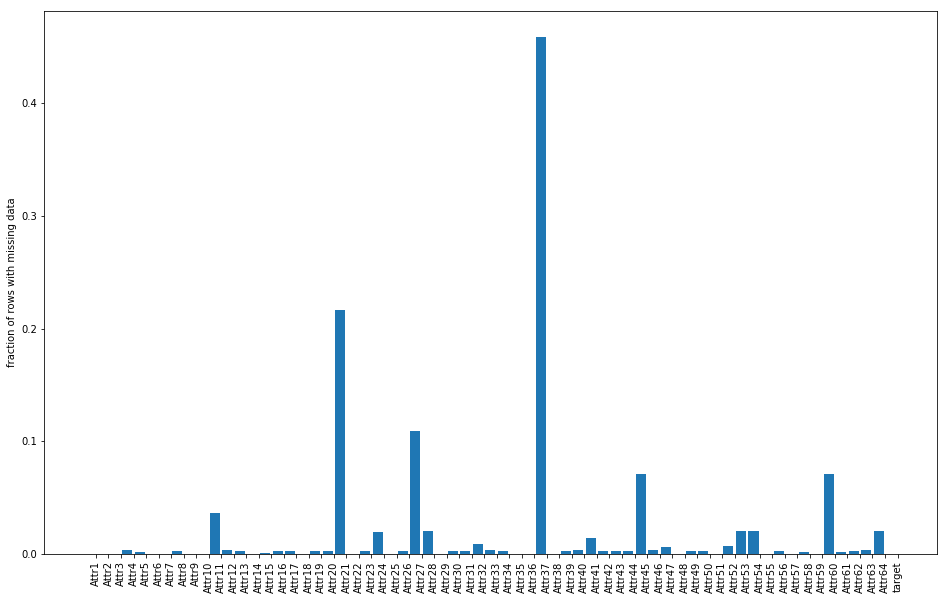

In [97]:
null_counts = bank_data.isnull().sum()/len(bank_data)
plt.figure(figsize=(16,10))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [ ]:
## Impute missing values with mean Imputation
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
imputed_diabetes = diabetes.copy()
imputed_diabetes.iloc[:,1:6] = mean_imputer.fit_transform(imputed_diabetes.iloc[:,1:6])

In [105]:
#Mean Imputation
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
bank_data_mean_imputed = bank_data.copy()
bank_data_mean_imputed.iloc[:,0:64] = mean_imputer.fit_transform(bank_data_mean_imputed.iloc[:,0:64])
bank_data_mean_imputed.head()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.036348,0.29370,0.22999,1.95800,49.611,0.323820,0.044336,2.17300,1.0571,0.63820,...,0.054040,0.056955,0.94596,0.084022,4.584600,2.1621,128.140,2.8484,1.2904,0
1,0.032515,0.25971,0.40845,2.57270,-6.682,-0.000148,0.040253,2.85050,2.1327,0.74029,...,0.000329,0.043921,0.98201,0.000000,4.773400,10.3800,44.448,8.2118,6.4267,0
2,0.019116,0.55685,-0.20328,0.56593,-59.719,0.000000,0.019116,0.79581,2.0933,0.44315,...,0.016719,0.043137,0.99131,0.110710,16.497000,15.4440,81.660,4.4698,2.8481,0
3,-0.173850,0.28684,0.20102,1.73250,356.930,0.000000,-0.173850,2.48630,3.0166,0.71316,...,0.178720,-0.243780,0.82306,0.000000,30.168000,51.1950,33.206,10.9920,5.7509,0
4,0.410710,0.14770,0.78015,6.28190,271.120,0.000000,0.534880,5.77040,1.6009,0.85230,...,0.326340,0.481890,0.66935,0.000000,395.932768,5.0324,33.676,10.8390,22.1870,0


In [106]:
#Checkng the mising values after the mean imputation
bank_data_mean_imputed.isnull().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
Attr11    0
Attr12    0
Attr13    0
Attr14    0
Attr15    0
Attr16    0
Attr17    0
Attr18    0
Attr19    0
Attr20    0
Attr21    0
Attr22    0
Attr23    0
Attr24    0
Attr25    0
Attr26    0
Attr27    0
Attr28    0
Attr29    0
Attr30    0
         ..
Attr36    0
Attr37    0
Attr38    0
Attr39    0
Attr40    0
Attr41    0
Attr42    0
Attr43    0
Attr44    0
Attr45    0
Attr46    0
Attr47    0
Attr48    0
Attr49    0
Attr50    0
Attr51    0
Attr52    0
Attr53    0
Attr54    0
Attr55    0
Attr56    0
Attr57    0
Attr58    0
Attr59    0
Attr60    0
Attr61    0
Attr62    0
Attr63    0
Attr64    0
target    0
Length: 65, dtype: int64

In [107]:
#Scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [108]:
## Split the data into X and y
X = bank_data_mean_imputed.drop("target",axis=1)
y = bank_data_mean_imputed["target"]

In [109]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [110]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19996, 64)
(5000, 64)
(19996,)
(5000,)


In [111]:
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,0:64])

X_train.iloc[:,0:64] = scaler.transform(X_train.iloc[:,0:64])
X_test.iloc[:,0:64] = scaler.transform(X_test.iloc[:,0:64])

C:\Users\Gnanendra\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Gnanendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

          Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
20046 -0.005074 -0.083782  0.092741  0.015579  0.014439  0.018589 -0.006513   
4197   0.032421 -0.031015  0.000561 -0.022622  0.012098  0.049740  0.022608   
1181   0.023192 -0.049580  0.050246 -0.015875  0.013761  0.018583  0.018904   
140    0.006985 -0.066840  0.057206 -0.012898  0.014600  0.018589 -0.002150   
18693  0.068885 -0.017791  0.007652 -0.022396  0.012102  0.018589  0.058229   

          Attr8     Attr9    Attr10    ...       Attr55    Attr56    Attr57  \
20046  0.005547  0.030770  0.020502    ...    -0.094232  0.007222  0.001505   
4197  -0.025433 -0.035012 -0.010045    ...    -0.090772  0.007217  0.035164   
1181  -0.021820 -0.030374  0.005339    ...    -0.096115  0.007267  0.018197   
140   -0.016039 -0.029313  0.012991    ...    -0.054821  0.007219  0.007361   
18693 -0.025788  0.025992 -0.008755    ...    -0.094155  0.007230  0.071208   

         Attr58    Attr59    Attr60    Attr61    A

In [119]:
#Building Models
#Buliding Logistic Regression
#Bulding K-Nearest Neighobours
#Building Support Vector Machine
#Building Decision Tree
#Building Random Forest

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [140]:
#Building the Logistic Regression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred_train_logistic = logistic.predict(X_train)
y_pred_test_logistic = logistic.predict(X_test)
print("Train Logistic Accuracy :",accuracy_score(y_true=y_train,y_pred=y_pred_train_logistic))
print("Test Logistic Accuracy :",accuracy_score(y_true=y_test,y_pred=y_pred_test_logistic))

Train Logistic Accuracy : 0.8343168633726745
Test Logistic Accuracy : 0.829


In [122]:
from sklearn.metrics import accuracy_score

Logistic Accuracy Test: 0.829
Logistic Accuracy Train: 0.8343168633726745


In [143]:
#Building the Support Vector Machine Classifier
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(X_train, y_train)
y_pred_train_svc = SVC.predict(X_train)
y_pred_test_svc = SVC.predict(X_test)

print("Train SVC Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_svc))
print("Test SVC Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_svc))

Train SVC Accuracy: 0.835617123424685
Test SVC Accuracy: 0.8298


In [144]:
#Building the Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_dtc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_dtc))

Train Decision Tree Accuracy: 1.0
Test Decision Tree Accuracy: 0.9204


In [145]:
#Budimg the model with KNN

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5) # default value for n_neighbors is 5
KNN.fit(X_train,y_train)
y_pred_train_KNN = KNN.predict(X_train)
y_pred_test_KNN = KNN.predict(X_test)

print("Train KNN Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_KNN))
print("Test KNN Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_KNN))

Train KNN Accuracy: 0.9067813562712542
Test KNN Accuracy: 0.872


In [147]:
#Building the Random Forest model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred_train_RFC = RFC.predict(X_train)
y_pred_test_RFC = RFC.predict(X_test)
print("Train RFC Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_RFC))
print("Test RFC Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_RFC))

Train RFC Accuracy: 0.9943488697739548
Test RFC Accuracy: 0.9366


In [148]:
stack = np.array([y_pred_test_dtc,y_pred_test_logistic,y_pred_test_svc,y_pred_test_KNN,y_pred_train_RFC]).T

In [152]:
from scipy.stats import mode
stacked_pred = mode(stack,axis=1)[0]

ValueError: operands could not be broadcast together with shapes (5000,) (19996,) 